In [1]:
import pandas as pd
from pathlib import Path

file_path = Path("..") / "data" / "raw" / "data.csv"  # change name if needed

print("File exists:", file_path.exists())

df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


File exists: True
Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [3]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4]:
df.describe(include="object")


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [5]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

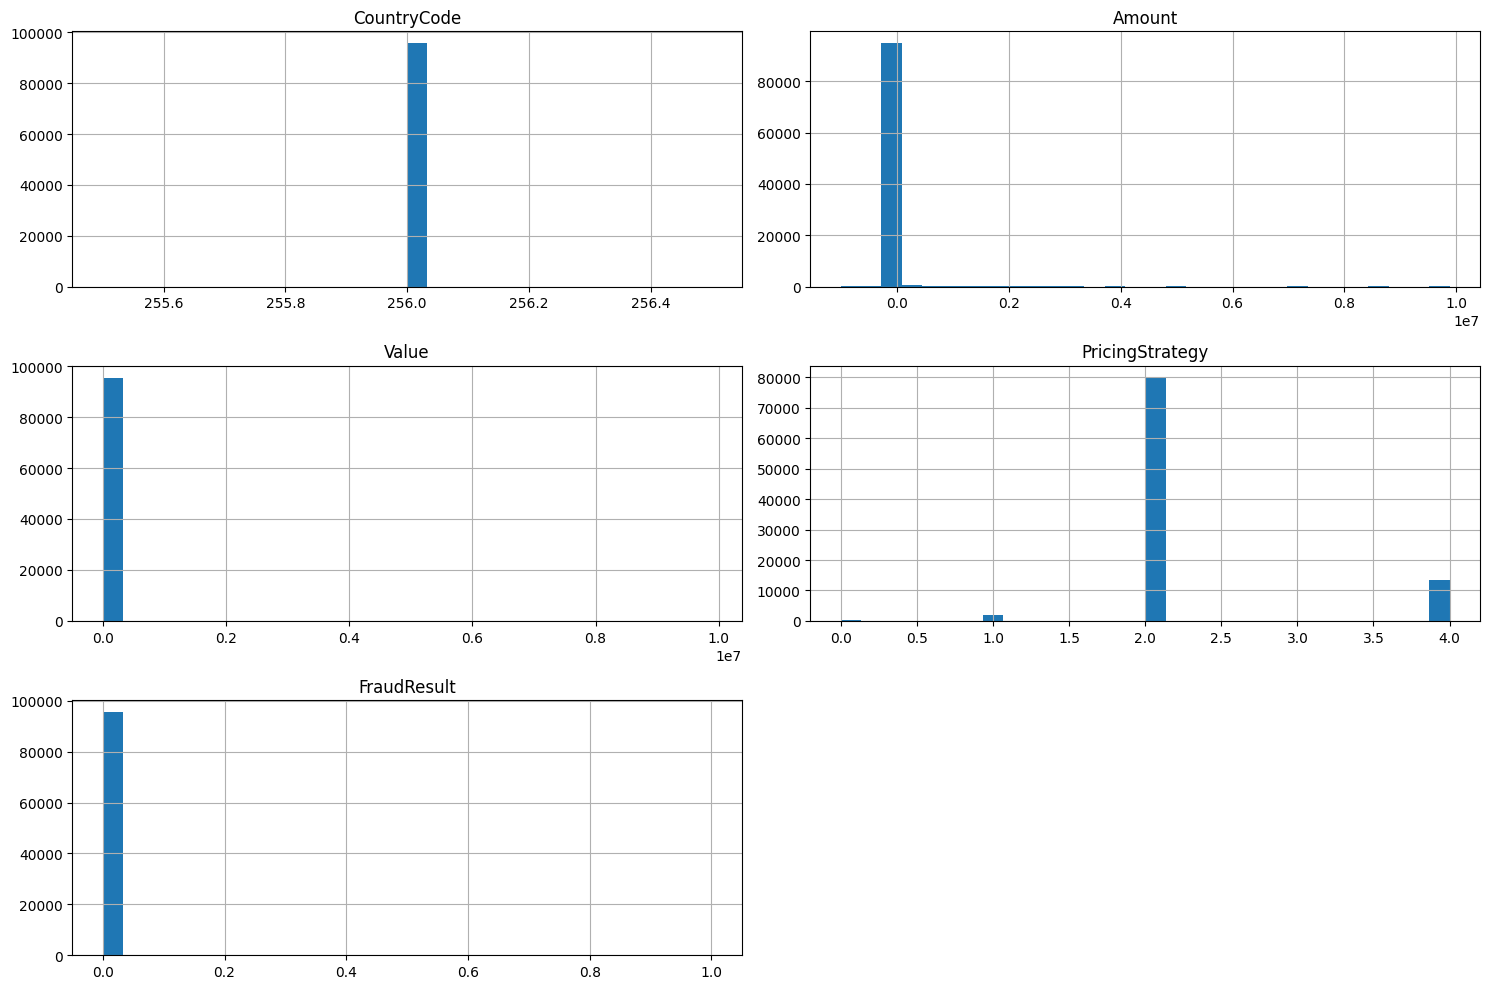

In [6]:
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


In [7]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

In [8]:
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts().head(10))
    print("-" * 40)


Column: TransactionId
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64
----------------------------------------
Column: BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64
----------------------------------------
Column: AccountId
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64
----------------------------------------
C

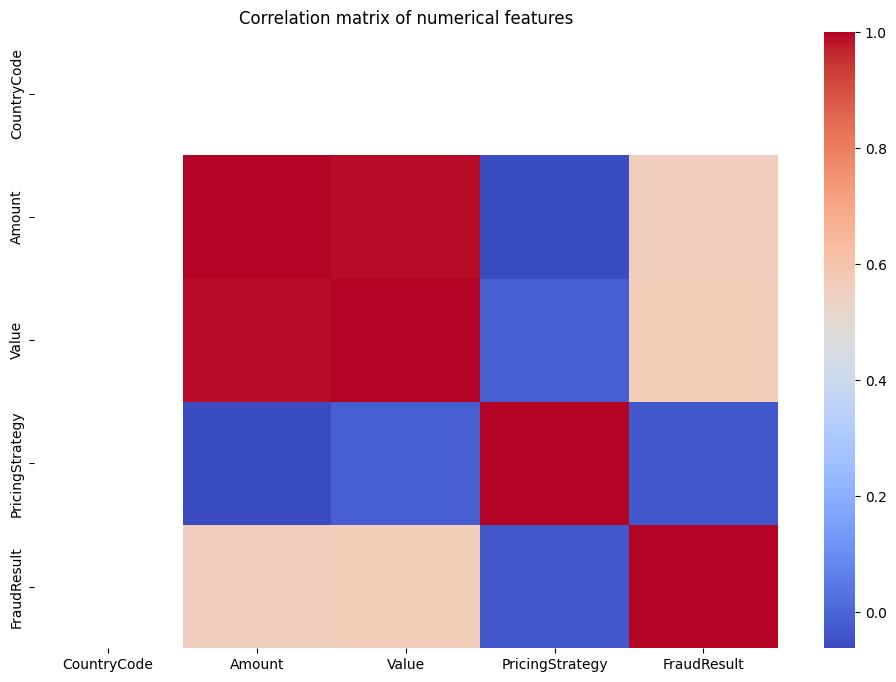

In [9]:
import seaborn as sns

corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation matrix of numerical features")
plt.show()


In [10]:
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})
missing_df[missing_df["missing_count"] > 0]


,missing_count,missing_percent


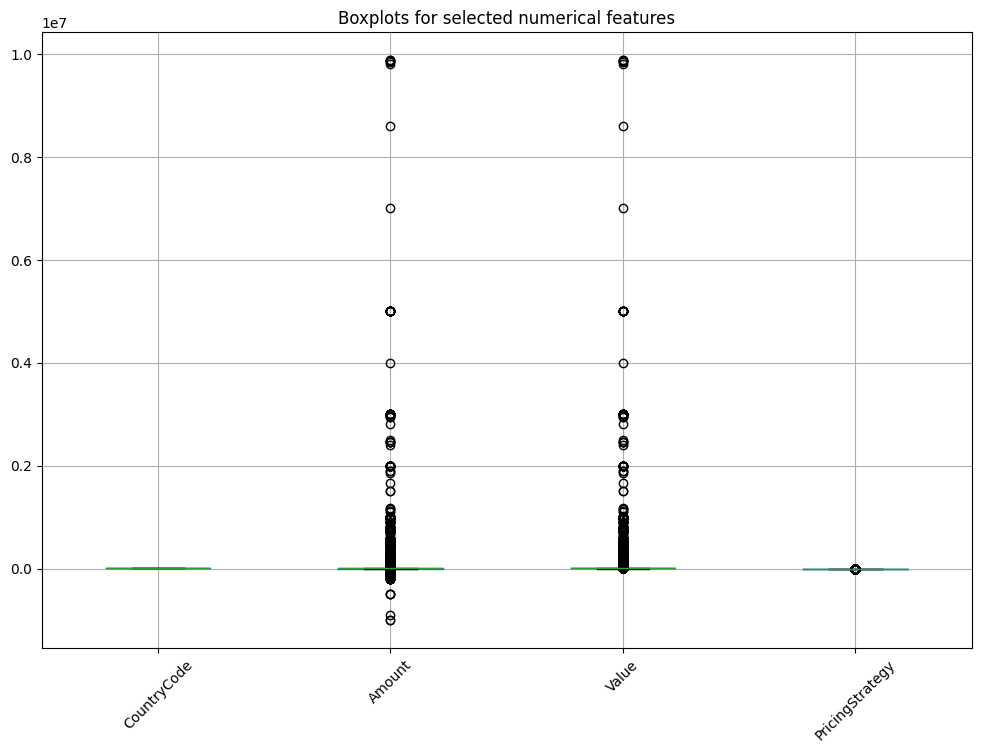

In [11]:
cols_for_boxplot = num_cols[:4]  # adjust if needed

plt.figure(figsize=(12, 8))
df[cols_for_boxplot].boxplot()
plt.title("Boxplots for selected numerical features")
plt.xticks(rotation=45)
plt.show()


Key Insights

1,Many identifier columns such as TransactionId, AccountId, and CustomerId have almost all unique values, so they are not useful as direct predictive features and should instead be used for grouping and aggregation (for example, per‑customer features).​

2, Monetary variables such as Amount and Value are highly skewed, with most transactions at relatively low amounts and a few very large values, which suggests that scaling and possible outlier‑robust methods will be important in modelling.​

3, Some categorical variables, such as CountryCode and certain PricingStrategy or ChannelId categories, appear heavily concentrated in one or two values, indicating that the dataset is dominated by a small number of geographic or pricing patterns.​

4, The FraudResult column is very imbalanced, with most transactions labeled as non‑fraud, which implies that any fraud‑related analysis or use of this variable must handle class imbalance carefully.​

5, The TransactionStartTime field contains repeated timestamps but also a wide spread over time, which will allow extraction of temporal features (hour, day, month, year) to capture behavioural patterns while remembering that the raw timestamp itself is not directly model‑friendly
